In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [97]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [98]:
df=pd.read_csv("../data/MainData.csv")
df.shape

(11092, 248)

In [99]:
df.head(3)

,pid,respid,w01hhsize,w01A002_age,w01edu,w01gender1,w01region1,w01region3,w01C152,w01C056,w01C075,w01C083,w01C105,w01C107,w01C108,w01C144,w01bmi,w01smoke,w01iadl,w01mmse,w01mmseg,w01chronic_a,w01chronic_b,w01chronic_c,w01chronic_d,w01chronic_e,w01chronic_f,w01chronic_g,w01chronic_h,w01chronic_i,w01present_labor,w02hhsize,w02A002_age,w02edu,w02gender1,w02region1,w02region3,w02C152,w02C056,w02C075,w02C083,w02C105,w02C107,w02C108,w02C144,w02bmi,w02smoke,w02alc,w02adl,w02iadl,w02mmse,w02mmseg,w02chronic_a,w02chronic_b,w02chronic_c,w02chronic_d,w02chronic_e,w02chronic_f,w02chronic_g,w02chronic_h,w02chronic_i,w02present_labor,w03hhsize,w03A002_age,w03edu,w03gender1,w03region1,w03region3,w03C152,w03C056,w03C075,w03C083,w03C105,w03C107,w03C108,w03C144,w03bmi,w03smoke,w03alc,w03adl,w03iadl,w03mmseg,w03mmse,w03chronic_a,w03chronic_b,w03chronic_c,w03chronic_d,w03chronic_e,w03chronic_f,w03chronic_g,w03chronic_h,w03chronic_i,w03present_labor,w04hhsize,w04A002_age,w04edu,w04gender1,w04region1,w04region3,w04C152,w04C056,w04C075,w04C083,w04C105,w04C107,w04C108,w04C144,w04bmi,w04smoke,w04alc,w04adl,w04iadl,w04mmseg,w04mmse,w04chronic_a,w04chronic_b,w04chronic_c,w04chronic_d,w04chronic_e,w04chronic_f,w04chronic_g,w04chronic_h,w04chronic_i,w04present_labor,w05hhsize,w05A002_age,w05edu,w05gender1,w05region1,w05region3,w05C152,w05C056,w05C075,w05C083,w05C105,w05C107,w05C108,w05C144,w05bmi,w05smoke,w05alc,w05adl,w05iadl,w05mmseg,w05mmse,w05chronic_a,w05chronic_b,w05chronic_c,w05chronic_d,w05chronic_e,w05chronic_f,w05chronic_g,w05chronic_h,w05chronic_i,w05present_labor,w06hhsize,w06A002_age,w06edu,w06gender1,w06region1,w06region3,w06C152,w06C056,w06C075,w06C083,w06C105,w06C107,w06C108,w06C144,w06bmi,w06smoke,w06alc,w06adl,w06iadl,w06mmseg,w06mmse,w06chronic_a,w06chronic_b,w06chronic_c,w06chronic_d,w06chronic_e,w06chronic_f,w06chronic_g,w06chronic_h,w06chronic_i,w06present_labor,w07hhsize,w07A002_age,w07edu,w07gender1,w07region1,w07region3,w07C152,w07C056,w07C075,w07C083,w07C105,w07C107,w07C108,w07C144,w07bmi,w07smoke,w07alc,w07adl,w07iadl,w07mmseg,w07mmse,w07chronic_a,w07chronic_b,w07chronic_c,w07chronic_d,w07chronic_e,w07chronic_f,w07chronic_g,w07chronic_h,w07chronic_i,w07present_labor,w08hhsize,w08A002_age,w08edu,w08gender1,w08region1,w08region3,w08C152,w08C056,w08C075,w08C083,w08C105,w08C107,w08C108,w08C144,w08bmi,w08smoke,w08alc,w08adl,w08iadl,w08mmseg,w08mmse,w08chronic_a,w08chronic_b,w08chronic_c,w08chronic_d,w08chronic_e,w08chronic_f,w08chronic_g,w08chronic_h,w08chronic_i,w08present_labor
0,11,1.0,1.0,73.0,2.0,5.0,11.0,1.0,4.0,1.0,4.0,2.0,60.0,152.0,5.0,1.0,25.969529,0.0,0.0,29.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,75.0,2.0,5.0,11.0,1.0,2.0,5.0,3.0,2.0,58.0,150.0,5.0,1.0,25.777778,0.0,3.0,0.0,0.0,29.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,150.0,NaN,NaN,25.777778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,79.0,2.0,5.0,11.0,1.0,3.0,5.0,2.0,2.0,55.0,150.0,5.0,2.0,24.444444,0.0,3.0,0.0,0.0,3.0,27.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,81.0,2.0,5.0,11.0,1.0,3.0,1.0,3.0,3.0,57.0,150.0,5.0,1.0,25.333333,0.0,3.0,0.0,0.0,3.0,25.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,83.0,2.0,5.0,11.0,1.0,3.0,5.0,4.0,2.0,56.0,150.0,5.0,1.0,24.888889,0.0,3.0,0.0,0.0,2.0,22.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,85.0,2.0,5.0,11.0,1.0,3.0,5.0,4.0,4.0,53.0,150.0,5.0,2.0,23.555556,0.0,3.0,0.0,0.0,1.0,15.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,87.0,2.0,5.0,11.0,1.0,4.0,5.0,5.0,4.0,50.0,148.0,1.0,2.0,22.826881,0.0,3.0,0.0,6.0,1.0,13.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0
1,21,1.0,2.0,51.0,4.0,5.0,11.0,1.0,2.0,5.0,2.0,2.0,59.0,158.0,5.0,1.0,23.634033,0.0,0.0,30.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,53.0,4.0,5.0,11.0,1.0,3.0,5.0,3.0,2.0,65.0,158.0,1.0,2.0,26.037494,0.0,3.0,0.0,0.0,29.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,55.0,4.0,5.0,11.0,1.0,3.0,5.0,3.0,2.0,62.0,159.0,1.0,1.0,24.524346,0.0,3.0,0.0,0.0,3.0,30.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0

In [100]:
df1=df.loc[:,'w01hhsize':'w01present_labor']
df2=df.loc[:,'w02hhsize':'w02present_labor']
df3=df.loc[:,'w03hhsize':'w03present_labor']
df4=df.loc[:,'w04hhsize':'w04present_labor']
df5=df.loc[:,'w05hhsize':'w05present_labor']
df6=df.loc[:,'w06hhsize':'w06present_labor']
df7=df.loc[:,'w07hhsize':'w07present_labor']
df8=df.loc[:,'w08hhsize':'w08present_labor']

In [101]:
# 1차 설문조사에 alc 과  adl점수가 없음. --> 2차~8차 데이터만 사용
print(df1.shape,df2.shape,df3.shape,df4.shape,df5.shape,df6.shape,df7.shape,df8.shape)

(11092, 29) (11092, 31) (11092, 31) (11092, 31) (11092, 31) (11092, 31) (11092, 31) (11092, 31)


In [102]:
# 여기서 11092 명 -> 4128 은 2차 ~ 8차 까지의 설문데이터가 모두 있는 경우를 의미함.
df=pd.concat([df2,df3,df4,df5,df6,df7,df8],axis=1).dropna(axis=0)
df.shape

(4128, 217)

In [103]:
# 제거 할 변수 추가 < region1, 낙상, adl ,iadl, 악력 > 제거
y=df['w08mmse']
X=df[df.columns.drop(list(df.filter(regex=r'(region1|adl|C056|mmse)')))]
print(X.shape,y.shape)

(4128, 175) (4128,)


In [104]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()

X=pd.DataFrame(sc.fit_transform(X))

In [105]:
# Array 를 (Size, Time, Dimension)의 tensor로 변환
X=X.values.reshape(X.shape[0],7,-1)
print(X.shape,y.shape) # (size,timestep,feature)

(4128, 7, 25) (4128,)


In [106]:
# Train Test Set 으로 Split 하자
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)

In [107]:
print(X_train.shape,X_test.shape)

(3302, 7, 25) (826, 7, 25)


# LSTM Many-to-one

In [108]:
# LSTM many-to-one 구현
model = Sequential() # Sequeatial Model
model.add(LSTM(24, input_shape=(7, 25),return_sequences=False)) # (timestep, feature)
model.add(Dense(10,activation='relu'))
model.add(Dense(1)) # output = 1
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 24)                4800      
                                                                 
 dense_22 (Dense)            (None, 10)                250       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
_________________________________________________________________


In [109]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint("lstm.h5", save_best_only=True)
rlr = ReduceLROnPlateau(factor=0.2, patience=3)

# fit model
history = model.fit(X_train, y_train, batch_size=16, validation_split=0.2, epochs=50,callbacks=[es,mc,rlr])

Epoch 1/50


2023-01-13 17:33:21.062850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-13 17:33:21.173249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-13 17:33:21.252890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


166/166 [==============================] - ETA: 0s - loss: 247.9324 - root_mean_squared_error: 15.7459

2023-01-13 17:33:22.861085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-13 17:33:22.902916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


166/166 [==============================] - 3s 11ms/step - loss: 247.9324 - root_mean_squared_error: 15.7459 - val_loss: 39.4683 - val_root_mean_squared_error: 6.2824 - lr: 0.0010
Epoch 2/50
166/166 [==============================] - 1s 9ms/step - loss: 29.3166 - root_mean_squared_error: 5.4145 - val_loss: 30.8295 - val_root_mean_squared_error: 5.5524 - lr: 0.0010
Epoch 3/50
166/166 [==============================] - 2s 9ms/step - loss: 28.3507 - root_mean_squared_error: 5.3245 - val_loss: 30.6935 - val_root_mean_squared_error: 5.5402 - lr: 0.0010
Epoch 4/50
166/166 [==============================] - 1s 9ms/step - loss: 27.4802 - root_mean_squared_error: 5.2422 - val_loss: 26.7408 - val_root_mean_squared_error: 5.1712 - lr: 0.0010
Epoch 5/50
166/166 [==============================] - 2s 9ms/step - loss: 23.2907 - root_mean_squared_error: 4.8260 - val_loss: 22.2622 - val_root_mean_squared_error: 4.7183 - lr: 0.0010
Epoch 6/50
166/166 [==============================] - 2s 9ms/step - loss:

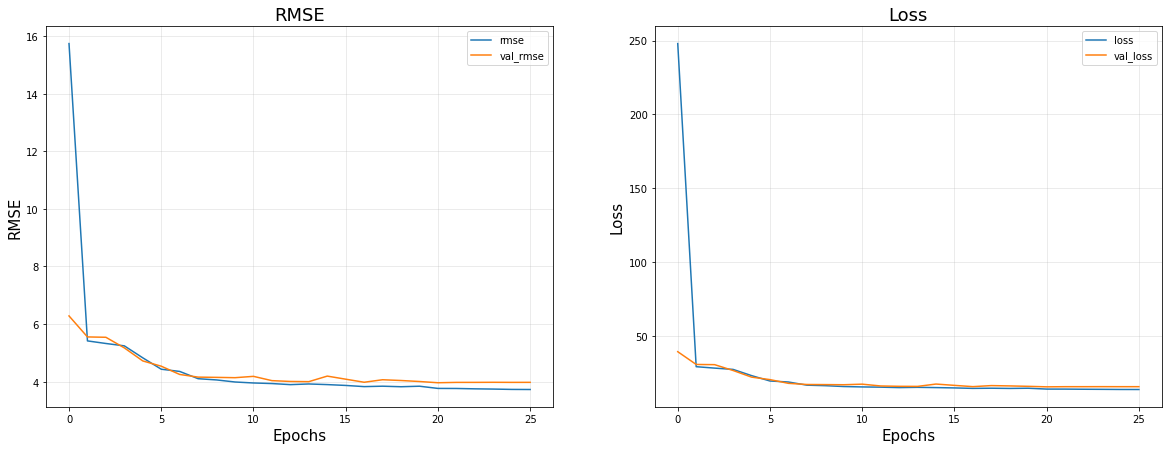

In [110]:
import matplotlib.pyplot as plt
def plot_history(history):
    fig = plt.figure(figsize=(20,7))
    fig.add_subplot(121)

    # Accuracy
    plt.plot(history.epoch, history.history['root_mean_squared_error'], label = "rmse")
    plt.plot(history.epoch, history.history['val_root_mean_squared_error'], label = "val_rmse")

    plt.title("RMSE", fontsize=18)
    plt.xlabel("Epochs", fontsize=15)
    plt.ylabel("RMSE", fontsize=15)
    plt.grid(alpha=0.3)
    plt.legend()


    #Adding Subplot 1 (For Loss)
    fig.add_subplot(122)

    plt.plot(history.epoch, history.history['loss'], label="loss")
    plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

    plt.title("Loss", fontsize=18)
    plt.xlabel("Epochs", fontsize=15)
    plt.ylabel("Loss", fontsize=15)
    plt.grid(alpha=0.3)
    plt.legend()

    plt.show()
    
plot_history(history)

In [113]:
y_pred=model.predict(X_test)
y_pred.shape

26/26 [==============================] - 0s 4ms/step


2023-01-13 17:34:38.697217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-13 17:34:38.732286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(826, 1)

In [114]:
import numpy as np
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

3.929185713482305

# LSTM Many to Many

In [67]:
# LSTM 2차 부터 8차까지 MMSE,MMSEG 를 제외한 데이터 만들기 2차~8차 MMSE 점수가 Target 변수
df=pd.read_csv("../data/MainData.csv")
df=df[df.columns.drop(list(df.filter(regex=r'(region1|adl|C056)')))]
df1=df.loc[:,'w01hhsize':'w01present_labor']
df2=df.loc[:,'w02hhsize':'w02present_labor']
df3=df.loc[:,'w03hhsize':'w03present_labor']
df4=df.loc[:,'w04hhsize':'w04present_labor']
df5=df.loc[:,'w05hhsize':'w05present_labor']
df6=df.loc[:,'w06hhsize':'w06present_labor']
df7=df.loc[:,'w07hhsize':'w07present_labor']
df8=df.loc[:,'w08hhsize':'w08present_labor']

df_new=pd.concat([df2,df3,df4,df5,df6,df7,df8],axis=1).dropna(axis=0)

X=df_new.drop(['w02mmse','w02mmseg','w03mmse','w03mmseg','w04mmse','w04mmseg','w05mmse','w05mmseg','w06mmse','w06mmseg','w07mmse','w07mmseg','w08mmse','w08mmseg'],axis=1)
y=df_new[['w02mmse','w03mmse','w04mmse','w05mmse','w06mmse','w07mmse','w08mmse']]

from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()

X=pd.DataFrame(sc.fit_transform(X))

X=X.values.reshape(X.shape[0],7,-1)

# Train Test Set 으로 Split 하자
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [74]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3302, 7, 25) (826, 7, 25) (3302, 7) (826, 7)


In [90]:
# LSTM many-to-many Hyperparameter Tuning
model2 = Sequential() # Sequeatial Model
model2.add(LSTM(128, input_shape=(7, 25),return_sequences=True)) # (timestep, feature)
model2.add(Dropout(0.2))
model2.add(LSTM(128,return_sequences=True))
model2.add(Dropout(0.2))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(16,activation='relu'))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(1)) # output = 1
model2.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 7, 128)            78848     
                                                                 
 dropout_6 (Dropout)         (None, 7, 128)            0         
                                                                 
 lstm_11 (LSTM)              (None, 7, 128)            131584    
                                                                 
 dropout_7 (Dropout)         (None, 7, 128)            0         
                                                                 
 dense_18 (Dense)            (None, 7, 64)             8256      
                                                                 
 dense_19 (Dense)            (None, 7, 16)             1040      
                                                                 
 dense_20 (Dense)            (None, 7, 8)             

In [91]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=5)
mc = ModelCheckpoint("lstm.h5", save_best_only=True)
rlr = ReduceLROnPlateau(factor=0.2, patience=3)

# fit model
history = model2.fit(X_train, y_train, batch_size=16, validation_split=0.2, epochs=50,callbacks=[es,mc,rlr])

Epoch 1/50


2023-01-13 17:30:08.372120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-13 17:30:08.586791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-13 17:30:08.636703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-13 17:30:08.759107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  4/166 [..............................] - ETA: 4s - loss: 681.8701 - root_mean_squared_error: 26.1126  

2023-01-13 17:30:08.830514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


166/166 [==============================] - ETA: 0s - loss: 108.6349 - root_mean_squared_error: 10.4228

2023-01-13 17:30:12.328127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-13 17:30:12.406372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-13 17:30:12.438920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


166/166 [==============================] - 6s 25ms/step - loss: 108.6349 - root_mean_squared_error: 10.4228 - val_loss: 19.4415 - val_root_mean_squared_error: 4.4092 - lr: 0.0010
Epoch 2/50
166/166 [==============================] - 3s 21ms/step - loss: 22.9811 - root_mean_squared_error: 4.7939 - val_loss: 18.8485 - val_root_mean_squared_error: 4.3415 - lr: 0.0010
Epoch 3/50
166/166 [==============================] - 3s 21ms/step - loss: 22.2328 - root_mean_squared_error: 4.7152 - val_loss: 18.3952 - val_root_mean_squared_error: 4.2890 - lr: 0.0010
Epoch 4/50
166/166 [==============================] - 3s 21ms/step - loss: 21.1542 - root_mean_squared_error: 4.5994 - val_loss: 16.2497 - val_root_mean_squared_error: 4.0311 - lr: 0.0010
Epoch 5/50
166/166 [==============================] - 3s 20ms/step - loss: 17.2688 - root_mean_squared_error: 4.1556 - val_loss: 13.5836 - val_root_mean_squared_error: 3.6856 - lr: 0.0010
Epoch 6/50
166/166 [==============================] - 3s 20ms/step - 

In [92]:
y_pred=model2.predict(X_test)
y_pred=y_pred.reshape(y_pred.shape[0],-1)
print(y_pred.shape)

 1/26 [>.............................] - ETA: 11s

2023-01-13 17:31:48.765340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-13 17:31:48.846592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-13 17:31:48.883805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 1s 12ms/step
(826, 7)


In [93]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

3.5286121014011

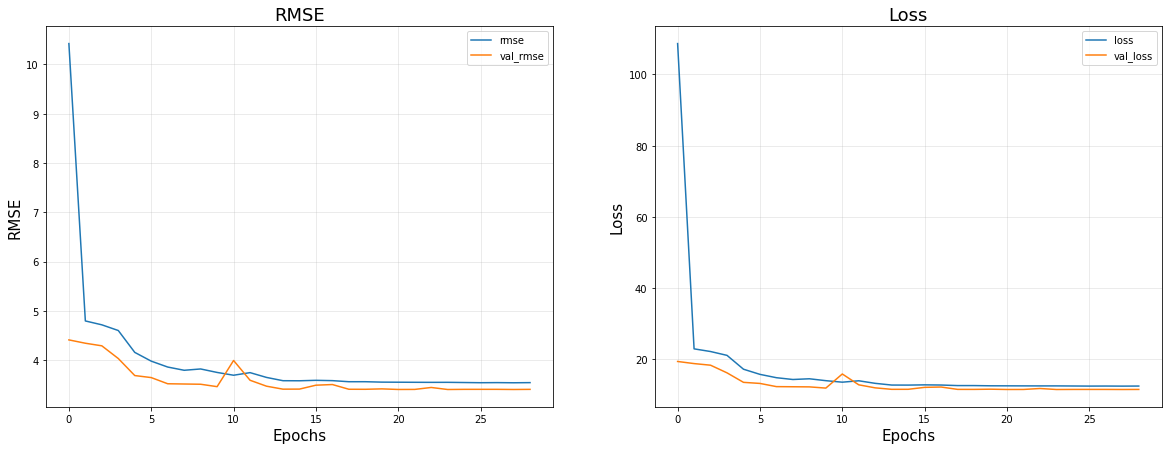

In [94]:
plot_history(history)